In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('files/all_claims_files.csv')

In [3]:
df['year'] = df['file_name'].map(lambda x: x[6:10])

In [4]:
df_sum = df.groupby('year')['MEDREIMB_IP'].sum()

In [5]:
df_sum

year
2008    5065290
2009    4932150
2010    2225930
Name: MEDREIMB_IP, dtype: int64

In [6]:
# Use the pd.to_datetime function to convert to time series
df_sum.index = pd.to_datetime(df_sum.index)

In [7]:
df_sum.shift() # Shift inpatient costs one year forward

year
2008-01-01          NaN
2009-01-01    5065290.0
2010-01-01    4932150.0
Name: MEDREIMB_IP, dtype: float64

In [8]:
df_sum.shift(-1) # Lag inpatient costs by a year

year
2008-01-01    4932150.0
2009-01-01    2225930.0
2010-01-01          NaN
Name: MEDREIMB_IP, dtype: float64

In [9]:
df_sum.cumsum() # Calculate cumulative sum

year
2008-01-01     5065290
2009-01-01     9997440
2010-01-01    12223370
Name: MEDREIMB_IP, dtype: int64

In [10]:
# Rolling is the equivalent of groupby for time series
# the window parameter states how many previous values are needed to calculate the recursion
# the rolling two-year sum is calculated below
df_sum.rolling(window=2).sum()

year
2008-01-01          NaN
2009-01-01    9997440.0
2010-01-01    7158080.0
Name: MEDREIMB_IP, dtype: float64

In [11]:
df_sum.rolling(window=2).mean() # calculate rolling average

year
2008-01-01          NaN
2009-01-01    4998720.0
2010-01-01    3579040.0
Name: MEDREIMB_IP, dtype: float64

In [12]:
def yoy_ratio(x):
    return x[1] / x[0]

In [13]:
df_sum.rolling(2).apply(yoy_ratio) # calculate the year-over-year increase in inpatient costs

year
2008-01-01         NaN
2009-01-01    0.973715
2010-01-01    0.451310
Name: MEDREIMB_IP, dtype: float64

In [14]:
def yoy_trend(x):
    return (x[1] / x[0]) - 1

In [15]:
df_sum.rolling(2).apply(yoy_trend) # calculate the period-to-period trend

year
2008-01-01         NaN
2009-01-01   -0.026285
2010-01-01   -0.548690
Name: MEDREIMB_IP, dtype: float64

In [16]:
def rolling_GM(x):
    return (x[0] * x[1]) ** .5

In [17]:
df_sum.rolling(2).apply(rolling_GM) # calculate a custom window function i.e. rolling geometric mean

year
2008-01-01             NaN
2009-01-01    4.998277e+06
2010-01-01    3.313400e+06
Name: MEDREIMB_IP, dtype: float64

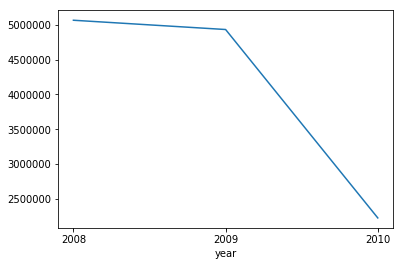

In [19]:
df_sum.plot()